In [1]:
import warnings
warnings.simplefilter("ignore")
import pandas  as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [2]:
data = load_boston()

In [3]:
df = pd.DataFrame(data.get("data"),columns=data.get("feature_names"))
df["target"] = data.get("target")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
x_train,x_test,y_train,y_test = train_test_split(df.drop("target",axis=1),df["target"],test_size=0.2,
                                                 random_state=42)

In [5]:
def perform_hyperparameter_tuning(model,model_params,scoring_type,X_train,y_train,cv_type=None):
    
    model_cv = RandomizedSearchCV(model, param_distributions=model_params, \
                                  cv=cv_type, scoring=scoring_type,random_state=42,n_iter=25)
    model_cv.fit(X_train,y_train)
    return model_cv.best_params_,model_cv.best_score_

In [6]:
model = RandomForestRegressor(random_state=42)
model_params = {"n_estimators":np.arange(50,100,10),
                "min_samples_leaf":np.arange(20,50,5),
                "min_samples_split":np.arange(40,100,10),
                }

In [7]:
best_params_,best_score_ = perform_hyperparameter_tuning(model=model,model_params=model_params,
                              scoring_type="neg_mean_squared_error",
                              X_train=x_train,y_train=y_train)

In [8]:
best_params_,best_score_

({'n_estimators': 90, 'min_samples_split': 50, 'min_samples_leaf': 20},
 -23.812865615497277)

In [9]:
model = RandomForestRegressor(random_state=42,**best_params_)
model.fit(x_train,y_train)

RandomForestRegressor(min_samples_leaf=20, min_samples_split=50,
                      n_estimators=90, random_state=42)

In [10]:
df_test = pd.DataFrame()
df_test["actual"] = y_test
df_test["prediction"] = np.round(model.predict(x_test),2) 

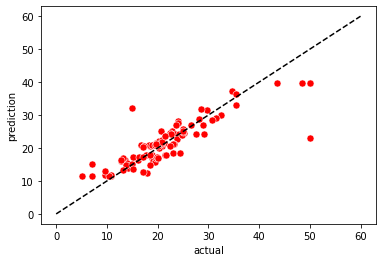

In [11]:
sns.scatterplot(data=df_test,x="actual",y="prediction",color="red",s=50)
plt.plot([0,60],[0,60],color="black",linestyle="--");

In [12]:
joblib.dump(model,"container/model")

['container/model']